<a href="https://colab.research.google.com/github/Dulavinya/EN3160-ImageProcessing/blob/main/A01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving a1images.zip to a1images.zip


In [2]:
import zipfile
import os

# Replace 'images.zip' with your actual zip file name
zip_file = "a1images.zip"

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall("images")  # Extract to folder named "images"

# Optional: list files extracted
print("Files extracted to 'images/':", os.listdir("images"))


Files extracted to 'images/': ['a1images']


In [3]:
import os

# List the files to confirm
print(os.listdir("images/a1images"))



['emma.jpg', 'einstein.png', 'daisy.jpg', 'spider.png', 'jeniffer.jpg', 'highlights_and_shadows.jpg', 'shells.tif', 'brain_proton_density_slice.png', 'a1q5images']


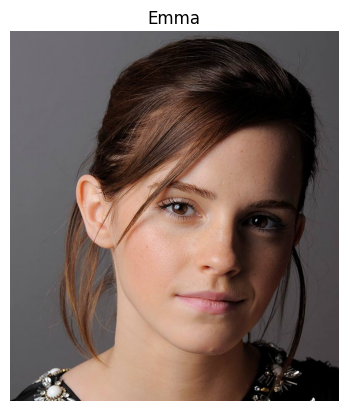

In [4]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

# Now load the image from the extracted folder
img = cv.imread("images/a1images/emma.jpg", cv.IMREAD_UNCHANGED)


if img is None:
    raise FileNotFoundError("Image not found. Check path and filename.")

# Display the image
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Emma")
plt.show()


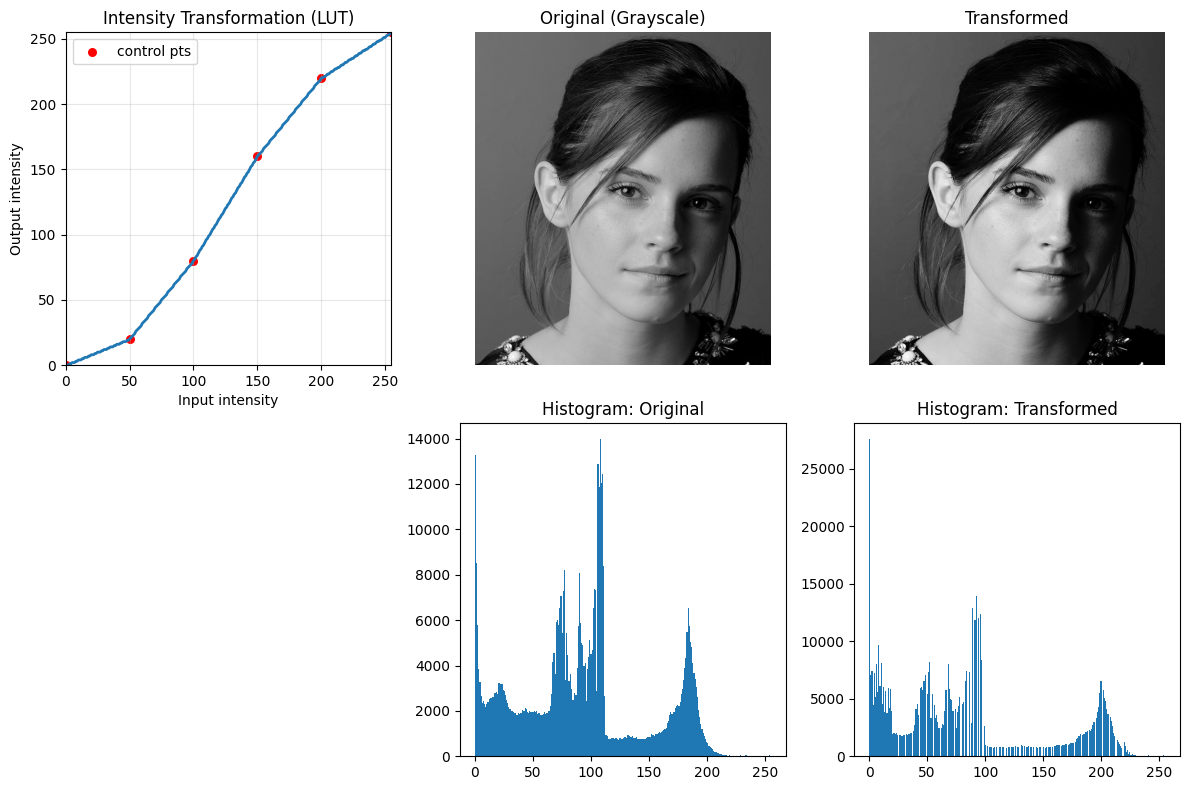

In [7]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# --- 1) Load image (Fig. 1b) ---
img = cv.imread("images/a1images/emma.jpg", cv.IMREAD_UNCHANGED)  # change path!
if img is None:
    raise FileNotFoundError("Update the image path to Fig. 1b")

# Handle color vs grayscale
if img.ndim == 3:
    # Convert to grayscale for Q1 unless your instructor expects color.
    # (If they want color, see the HSV path further below.)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
else:
    gray = img.copy()

# --- 2) Define piecewise-linear control points from Fig. 1a ---
# TODO: Replace these with your actual points read from the plot.
# Points must be sorted by x (input intensity). Always include (0, y0) and (255, yN).
# Example ONLY (placeholder!):
control_xy = np.array([
    [  0,   0],
    [ 50,  20],
    [100,  80],
    [150, 160],
    [200, 220],
    [255, 255]
], dtype=np.float32)

# Basic sanity checks
assert np.all(np.diff(control_xy[:,0]) >= 0), "x values must be non-decreasing"
assert control_xy[0,0] == 0 and control_xy[-1,0] == 255, "Include x=0 and x=255"

# --- 3) Build LUT by linear interpolation ---
x = control_xy[:,0]
y = control_xy[:,1]
x_query = np.arange(256, dtype=np.float32)
lut = np.interp(x_query, x, y)              # float64 result is fine
lut = np.clip(lut, 0, 255).astype(np.uint8) # cv2.LUT needs uint8

# --- 4) Apply LUT to the image ---
out = cv.LUT(gray, lut)

# --- 5) Visualize: mapping curve + images + histograms ---
fig = plt.figure(figsize=(12, 8))

# Mapping curve
ax1 = plt.subplot(2, 3, 1)
ax1.plot(x_query, lut, lw=2)
ax1.scatter(x, y, c="r", s=30, label="control pts")
ax1.set_title("Intensity Transformation (LUT)")
ax1.set_xlim(0, 255); ax1.set_ylim(0, 255)
ax1.set_xlabel("Input intensity"); ax1.set_ylabel("Output intensity")
ax1.grid(True, alpha=0.3)
ax1.legend()

# Original & transformed images
ax2 = plt.subplot(2, 3, 2)
ax2.imshow(gray, cmap="gray", vmin=0, vmax=255)
ax2.set_title("Original (Grayscale)")
ax2.axis("off")

ax3 = plt.subplot(2, 3, 3)
ax3.imshow(out, cmap="gray", vmin=0, vmax=255)
ax3.set_title("Transformed")
ax3.axis("off")

# Histograms (before/after)
ax4 = plt.subplot(2, 3, 5)
ax4.hist(gray.ravel(), bins=256, range=(0,255))
ax4.set_title("Histogram: Original")

ax5 = plt.subplot(2, 3, 6)
ax5.hist(out.ravel(), bins=256, range=(0,255))
ax5.set_title("Histogram: Transformed")

plt.tight_layout()
plt.show()
